In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
part_name = "AR"
rec_dir = Path().joinpath("parts/breakItDown/", part_name).resolve()
assert rec_dir.is_dir(), f"Please download the sample_recording_v2 into recordings/"
gaze = pd.read_csv(rec_dir.joinpath("gaze_positions.csv"))
actual_frames = "frames"
rec_dir

WindowsPath('C:/Users/shira/Documents/FRAMING/parts/breakItDown/AR')

In [18]:
# gaze_ts = gaze["gaze_timestamp"].to_numpy()
# len(gaze_ts)
# plt.plot(gaze_ts)
# plt.plot(np.diff(gaze_ts))
# (gaze_ts[-1]-gaze_ts[0])/len(gaze_ts)

In [3]:
def get_gaze_points(frame_number, num):

    # Get the extracted frame image path for the given index
    frame_i_path = Path().resolve()
    # Append path to extracted frame directory
    frame_i_path = frame_i_path.joinpath(rec_dir, actual_frames)
    # File name matching the "frame%06d.png" template
    frame_i_path = frame_i_path.joinpath(f"frame{str((frame_number + num)).rjust(6, '0')}.png")
    assert frame_i_path.is_file(), f"Can't find frame image at path: {frame_i_path}"
    print(frame_i_path)

    frame_index_image = plt.imread(frame_i_path)
    # Get the array of normalized gaze points for the given index
    gaze_points = gaze[gaze["world_index"] == frame_number]
    gaze_points = gaze_points.sort_values(by="gaze_timestamp")
    starting_ts = gaze_points["gaze_timestamp"].to_numpy()[0]
    end_ts = gaze_points["gaze_timestamp"].to_numpy()[-1]
    gaze_points = gaze_points[["norm_pos_x", "norm_pos_y"]]
    gaze_points = gaze_points.to_numpy()
    return gaze_points, frame_index_image, starting_ts, end_ts

def plot_img_w_traj(frame_number, num = 1):
    # frame_number = 198
    gaze_points, frame_index_image, starting_ts, end_ts = get_gaze_points(frame_number, num)
    # Split gaze points into separate X and Y coordinate arrays
    X, Y = gaze_points[:, 0], gaze_points[:, 1]
    # Flip the fixation points
    # from the original coordinate system,
    # where the origin is at botton left,
    # to the image coordinate system,
    # where the origin is at top left
    Y = 1 - Y
    # Denormalize gaze points within the frame
    H, W = frame_index_image.shape[:-1]
    X, Y = X * W, Y * H
    # Plotting configuration
    plt.figure(figsize=(16,9))
    plt.title(f"Frame #{(frame_number)}")
    plt.axis("off")
    # Draw the frame image
    plt.imshow(frame_index_image)
    # Draw the gaze points for the given frame
    plt.scatter(X, Y, color=(0.0, 0.7, 0.25), s=700, alpha=0.2)
    # Draw the gaze movement line for the given frame
    plt.plot(X, Y, color=(0.0, 0.0, 1.0), lw=3)
    plt.show()

    print(starting_ts, end_ts)
    
    return starting_ts, end_ts
    
def plot_img(frame_number, num = 1):
    
    # Get the extracted frame image path for the given index
    frame_i_path = Path().resolve()
    # Append path to extracted frame directory
    frame_i_path = frame_i_path.joinpath(rec_dir, actual_frames)
    # File name matching the "frame%06d.png" template
    frame_i_path = frame_i_path.joinpath(f"frame{str((frame_number + num)).rjust(6, '0')}.png")
    assert frame_i_path.is_file(), f"Can't find frame image at path: {frame_i_path}"
    print(frame_i_path)

    frame_index_image = plt.imread(frame_i_path)
    plt.figure(figsize=(16,9))
    plt.title(f"Frame #{(frame_number)}")
    plt.axis("off")
    # Draw the frame image
    plt.imshow(frame_index_image)
    # Draw the gaze points for the given frame
    plt.show()
    

C:\Users\shira\Documents\FRAMING\parts\breakItDown\AR\frames\frame000154.png


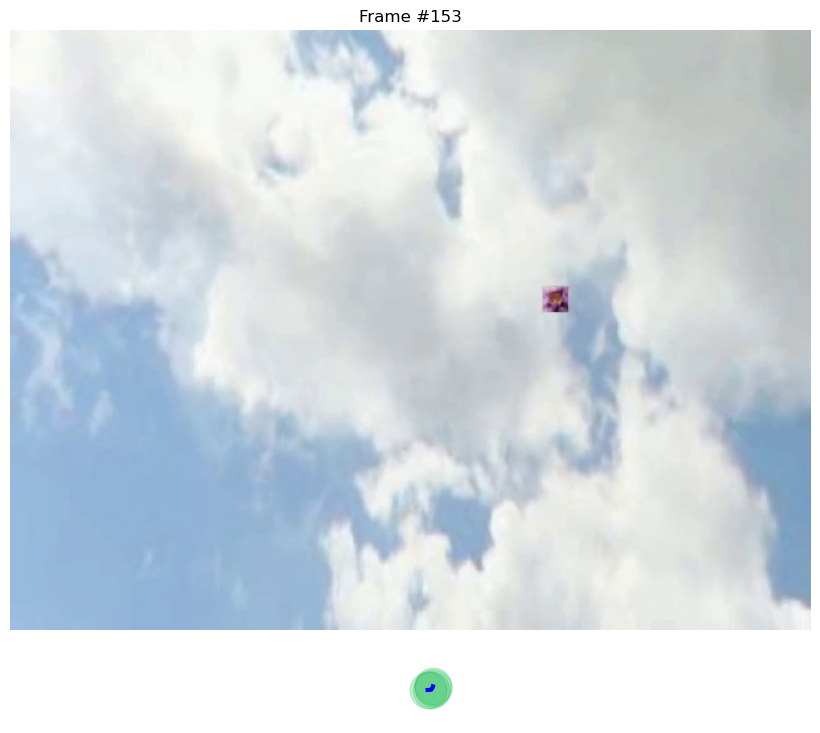

105758.168509 105758.194791
C:\Users\shira\Documents\FRAMING\parts\breakItDown\AR\frames\frame000154.png


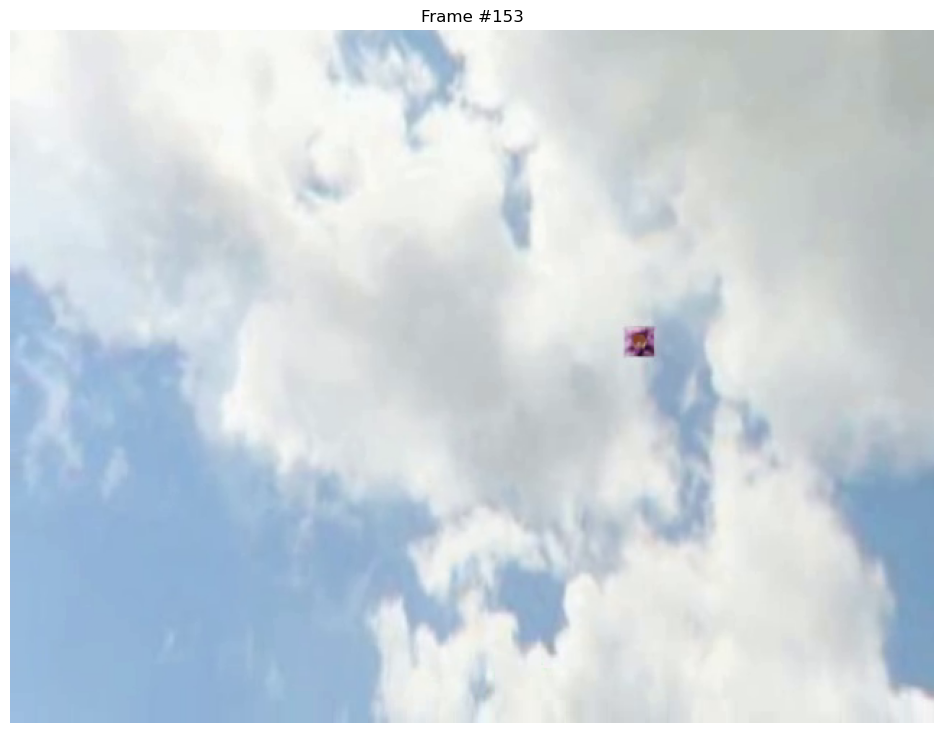

In [8]:
def do_what_i_want(start_fram, end_frame):
    starting_ts_1st, _ = plot_img_w_traj(start_fram)
    _, end_ts_last = plot_img_w_traj(end_frame)
    time_diff = float(end_ts_last) - float(starting_ts_1st)
    print (time_diff)

img = 153
plot_img_w_traj(img)
plot_img(img)